In [1]:
#Loading of Datasets
import pandas as pd

englishdf= pd.read_csv('ca2_files\percentage-of-gce-o-level-students-who-passed-english-language.csv')
mathematicsdf= pd.read_csv('ca2_files\percentage-of-gce-o-level-students-who-passed-mathematics.csv')
mtdf=pd.read_csv('ca2_files\percentage-of-gce-o-level-students-who-passed-mtl.csv')

df_1 = pd.merge(englishdf,mathematicsdf, how="inner")
df_all = pd.merge(df_1,mtdf, how="inner")
display(df_all)



,year,race,percentage_pass_eng,percentage_pass_math,percentage_pass_mtl
0,1997,Malay,59.8,60.7,99.0
1,1997,Chinese,69.9,90.0,95.2
2,1997,Indian,79.8,69.3,88.1
3,1997,Others,79.2,75.6,68.1
4,1997,Overall,69.4,85.2,95.0
...,...,...,...,...,...
110,2019,Malay,86.3,71.2,98.6
111,2019,Chinese,89.7,92.7,95.8
112,2019,Indian,90.9,83.1,94.9
113,2019,Others,92.8,88.1,86.2


In [2]:
#Textual analysis of the merged dataset
print('Sucessfully load 3 datasets ca2_files\percentage-of-gce-o-level-students-who-passed-english-language.csv, ca2_files\percentage-of-gce-o-level-students-who-passed-mathematics.csv, ca2_files\percentage-of-gce-o-level-students-who-passed-mtl.csv')
print()
print('This is the shape of the dataset')
print(df_all.shape)
print()
print('This is the index of the dataset')
print(df_all.index)
print()
print('These are the columns in the dataset')
print(df_all.columns)
print()
print('The total number of non-NA values in this dataset is:')
print(df_all.count())
print()
print('A summary of this dataset is shown below:')
print(df_all.info())
print()
print('A descriptive statistical summary of this dataset is shown below:')
print(df_all[{'percentage_pass_eng','percentage_pass_math','percentage_pass_mtl'}].describe())

Sucessfully load 3 datasets ca2_files\percentage-of-gce-o-level-students-who-passed-english-language.csv, ca2_files\percentage-of-gce-o-level-students-who-passed-mathematics.csv, ca2_files\percentage-of-gce-o-level-students-who-passed-mtl.csv

This is the shape of the dataset
(115, 5)

This is the index of the dataset
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            105, 106, 107, 108, 109, 110, 111, 112, 113, 114],
           dtype='int64', length=115)

These are the columns in the dataset
Index(['year', 'race', 'percentage_pass_eng', 'percentage_pass_math',
       'percentage_pass_mtl'],
      dtype='object')

The total number of non-NA values in this dataset is:
year                    115
race                    115
percentage_pass_eng     115
percentage_pass_math    115
percentage_pass_mtl     115
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (tot

In [3]:
#Reindexing
df_allreindex=df_all.set_index(['year'])
df_all2 = df_allreindex[df_allreindex.race == 'Overall']
display(df_all2)

,race,percentage_pass_eng,percentage_pass_math,percentage_pass_mtl
year,,,,
1997,Overall,69.4,85.2,95.0
1998,Overall,70.2,84.9,93.7
1999,Overall,73.8,86.3,94.4
2000,Overall,76.3,87.1,94.6
2001,Overall,79.8,86.6,96.2
2002,Overall,81.4,87.5,96.5
2003,Overall,84.1,87.7,97.4
2004,Overall,85.0,89.0,95.5
2005,Overall,86.0,88.3,96.0


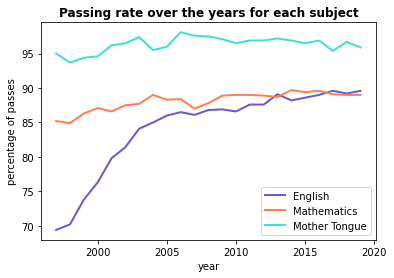

In [4]:
#Line Chart
import matplotlib.pyplot as plt

xlabels=["year"]
df_eng_overall=df_all2.percentage_pass_eng
df_maths_overall=df_all2.percentage_pass_math
df_mtl_overall=df_all2.percentage_pass_mtl

plt.figure()

plt.title('Passing rate over the years for each subject', fontsize=12, fontweight='bold')
plt.xlabel("year")
plt.ylabel("percentage of passes")

plt.plot(df_eng_overall,label='English',color='slateblue',linewidth=2)
plt.plot(df_maths_overall,label='Mathematics',color='coral',linewidth=2)
plt.plot(df_mtl_overall,label='Mother Tongue',color='turquoise',linewidth=2)

plt.legend()
plt.show()

In [5]:
#5 best and worst performing years for english
df_topeng = df_all2.nlargest(5, 'percentage_pass_eng')
df_topeng = df_topeng.drop(['percentage_pass_math','percentage_pass_mtl'],axis = 1)
print("***Top Performing Years for English***")
display(df_topeng)
print()
df_bottomeng = df_all2.nsmallest(5, 'percentage_pass_eng')
df_bottomeng = df_bottomeng.drop(['percentage_pass_math','percentage_pass_mtl'],axis = 1)
print("***Worst Performing Years for English***")
display(df_bottomeng)
print()

#5 best and worst performing years for math
df_topmath = df_all2.nlargest(5, 'percentage_pass_math')
df_topmath = df_topmath.drop(['percentage_pass_eng','percentage_pass_mtl'],axis = 1)
print("***Top Performing Years for Math***")
display(df_topmath)
print()
df_bottommath = df_all2.nsmallest(5, 'percentage_pass_math')
df_bottommath = df_bottommath.drop(['percentage_pass_eng','percentage_pass_mtl'],axis = 1)
print("***Worst Performing Years for Math***")
display(df_bottommath)
print()

#5 best and worst performing years for mother tongue
df_topmt = df_all2.nlargest(5, 'percentage_pass_mtl')
df_topmt = df_topmt.drop(['percentage_pass_eng','percentage_pass_math'],axis = 1)
print("***Top Performing Years for Mother Tongue***")
display(df_topmt)
print()
df_bottommt = df_all2.nsmallest(5, 'percentage_pass_mtl')
df_bottommt = df_bottommt.drop(['percentage_pass_eng','percentage_pass_math'],axis = 1)
print("***Worst 5 Performing Years for Mother Tongue***")
display(df_bottommt)
print()


***Top Performing Years for English***


,race,percentage_pass_eng
year,,
2017,Overall,89.6
2019,Overall,89.6
2018,Overall,89.2
2013,Overall,89.1
2016,Overall,89.0



***Worst Performing Years for English***


,race,percentage_pass_eng
year,,
1997,Overall,69.4
1998,Overall,70.2
1999,Overall,73.8
2000,Overall,76.3
2001,Overall,79.8



***Top Performing Years for Math***


,race,percentage_pass_math
year,,
2014,Overall,89.7
2016,Overall,89.6
2015,Overall,89.4
2017,Overall,89.1
2004,Overall,89.0



***Worst Performing Years for Math***


,race,percentage_pass_math
year,,
1998,Overall,84.9
1997,Overall,85.2
1999,Overall,86.3
2001,Overall,86.6
2007,Overall,87.0



***Top Performing Years for Mother Tongue***


,race,percentage_pass_mtl
year,,
2006,Overall,98.1
2007,Overall,97.6
2008,Overall,97.5
2003,Overall,97.4
2013,Overall,97.2



***Worst 5 Performing Years for Mother Tongue***


,race,percentage_pass_mtl
year,,
1998,Overall,93.7
1999,Overall,94.4
2000,Overall,94.6
1997,Overall,95.0
2017,Overall,95.4


In [6]:
#Percentage of Passes for different subjects  for the last 5 years 
df_last5years= df_allreindex.loc['2015':'2019']
df_last5years= df_last5years[df_last5years.race.isin(['Malay','Chinese','Indian','Others'])]
display(df_last5years)

,race,percentage_pass_eng,percentage_pass_math,percentage_pass_mtl
year,,,,
2015,Malay,82.6,71.3,99.3
2015,Chinese,89.2,93.3,96.0
2015,Indian,90.3,80.2,96.5
2015,Others,91.3,88.2,91.2
2016,Malay,85.3,70.6,99.4
2016,Chinese,89.1,93.5,96.7
2016,Indian,91.5,81.5,96.4
2016,Others,92.9,85.3,87.2
2017,Malay,84.3,70.2,98.9


Line2D(_line4)
Line2D(_line10)
Line2D(_line16)
Line2D(_line22)


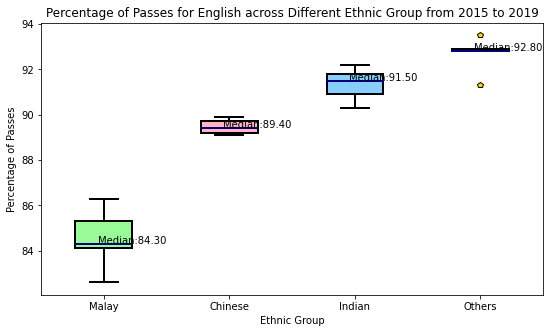

In [7]:
#Boxplot1: Passing rates for English in different Ethnic Groups 

import pandas as pd
import matplotlib.pyplot as plt

M = df_last5years[df_last5years['race']=='Malay']['percentage_pass_eng']
C = df_last5years[df_last5years['race']=='Chinese']['percentage_pass_eng']
I = df_last5years[df_last5years['race']=='Indian']['percentage_pass_eng']
O = df_last5years[df_last5years['race']=='Others']['percentage_pass_eng']

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
data=[M,C,I,O]
labels=['Malay','Chinese','Indian','Others']

#BOXPLOT PROPERTIES
boxprops = dict(linestyle='-', linewidth=2)
medianprops = dict(linestyle='-', linewidth=2, color='navy')
flierprops=dict(linewidth=2,markerfacecolor='gold',marker='p')
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)

boxeng=plt.boxplot(data,labels=labels,boxprops=boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops,capprops=capprops,patch_artist=True)

colors= ['palegreen', 'lightpink', 'lightskyblue','plum']
patchcolor= list(zip(boxeng['boxes'], colors))
for patch,color in patchcolor:
    patch.set_facecolor(color)
    
for line in boxeng['medians']:
    print(line)
    x,y=line.get_xydata()[1]
    plt.text(x,y,(f'Median:{y:.2f}'),horizontalalignment='center',fontsize=10)
    
plt.title("Percentage of Passes for English across Different Ethnic Group from 2015 to 2019")
plt.xlabel('Ethnic Group')
plt.ylabel('Percentage of Passes')    
plt.suptitle("")

plt.show()

Line2D(_line4)
Line2D(_line10)
Line2D(_line16)
Line2D(_line22)


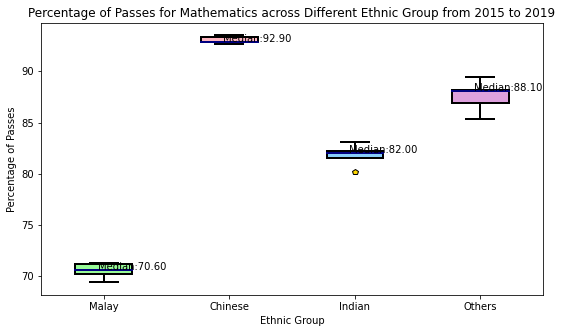

In [8]:
#Boxplot2: Passing rates for Mathematics in different Ethnic Groups 

import pandas as pd
import matplotlib.pyplot as plt

M = df_last5years[df_last5years['race']=='Malay']['percentage_pass_math']
C = df_last5years[df_last5years['race']=='Chinese']['percentage_pass_math']
I = df_last5years[df_last5years['race']=='Indian']['percentage_pass_math']
O = df_last5years[df_last5years['race']=='Others']['percentage_pass_math']

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
data=[M,C,I,O]
labels=['Malay','Chinese','Indian','Others']

boxprops = dict(linestyle='-', linewidth=2)
medianprops = dict(linestyle='-', linewidth=2, color='navy')
flierprops=dict(linewidth=2,markerfacecolor='gold',marker='p')
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)

boxmaths=plt.boxplot(data, labels=labels,boxprops=boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops,capprops=capprops,patch_artist=True)

colors= ['palegreen', 'lightpink', 'lightskyblue','plum']
patchcolor= list(zip(boxmaths['boxes'], colors))
for patch,color in patchcolor:
    patch.set_facecolor(color)
    
for line in boxmaths['medians']:
    print(line)
    x,y=line.get_xydata()[1]
    plt.text(x,y,(f'Median:{y:.2f}'),horizontalalignment='center',fontsize=10)
    
plt.title("Percentage of Passes for Mathematics across Different Ethnic Group from 2015 to 2019")
plt.xlabel('Ethnic Group')
plt.ylabel('Percentage of Passes')    
plt.suptitle("")

plt.show()

Line2D(_line4)
Line2D(_line10)
Line2D(_line16)
Line2D(_line22)


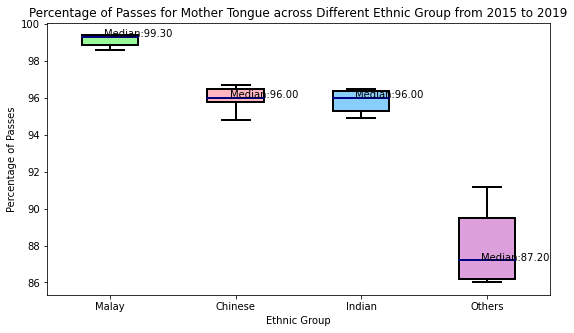

In [9]:
#Boxplot3: Passing rates for Mother Tongue in different Ethnic Groups 

import pandas as pd
import matplotlib.pyplot as plt

M = df_last5years[df_last5years['race']=='Malay']['percentage_pass_mtl']
C = df_last5years[df_last5years['race']=='Chinese']['percentage_pass_mtl']
I = df_last5years[df_last5years['race']=='Indian']['percentage_pass_mtl']
O = df_last5years[df_last5years['race']=='Others']['percentage_pass_mtl']

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
data=[M,C,I,O]
labels=['Malay','Chinese','Indian','Others']

boxprops = dict(linestyle='-', linewidth=2)
medianprops = dict(linestyle='-', linewidth=2, color='navy')
flierprops=dict(linewidth=2,markerfacecolor='gold',marker='p')
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)

boxmt=plt.boxplot(data, labels=labels,boxprops=boxprops,medianprops=medianprops,flierprops=flierprops,whiskerprops=whiskerprops,capprops=capprops,patch_artist=True)

colors= ['palegreen', 'lightpink', 'lightskyblue','plum']
patchcolor= list(zip(boxmt['boxes'], colors))
for patch,color in patchcolor:
    patch.set_facecolor(color)
    
for line in boxmt['medians']:
    print(line)
    x,y=line.get_xydata()[1]
    plt.text(x,y,(f'Median:{y:.2f}'),horizontalalignment='center',fontsize=10)
    
plt.title("Percentage of Passes for Mother Tongue across Different Ethnic Group from 2015 to 2019")
plt.xlabel('Ethnic Group')
plt.ylabel('Percentage of Passes')    
plt.suptitle("")

plt.show()